In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
sns.set_style("darkgrid")
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv("/content/Wholesale.csv")
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [8]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<Axes: >

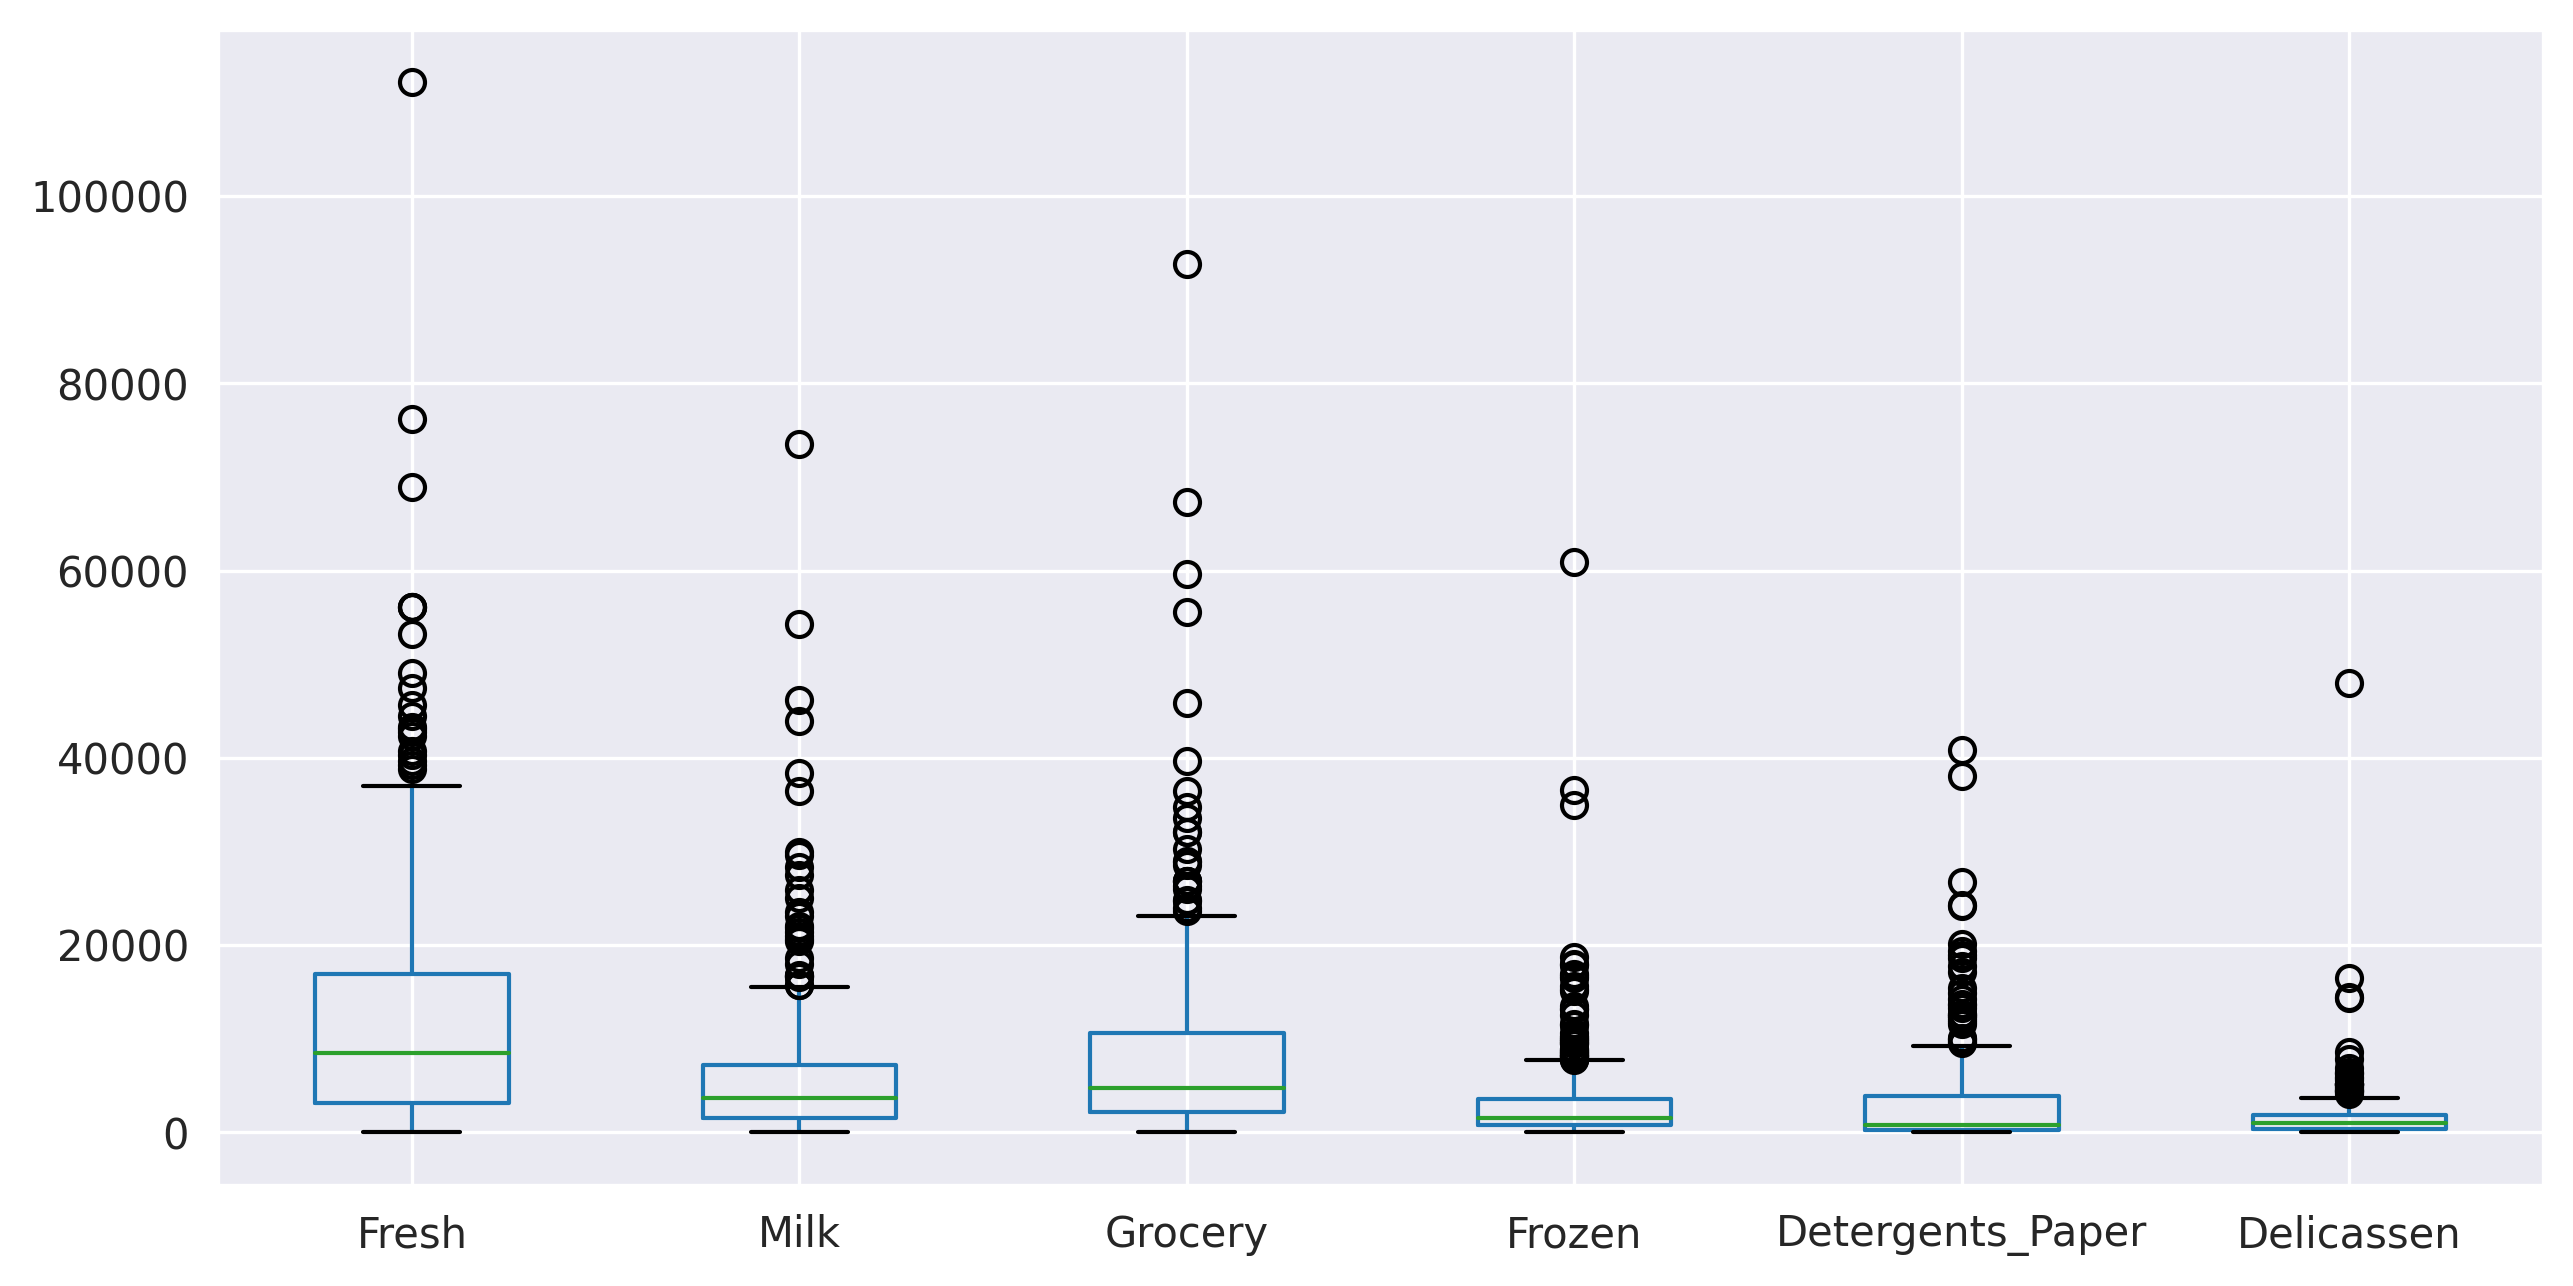

In [9]:
df.boxplot()

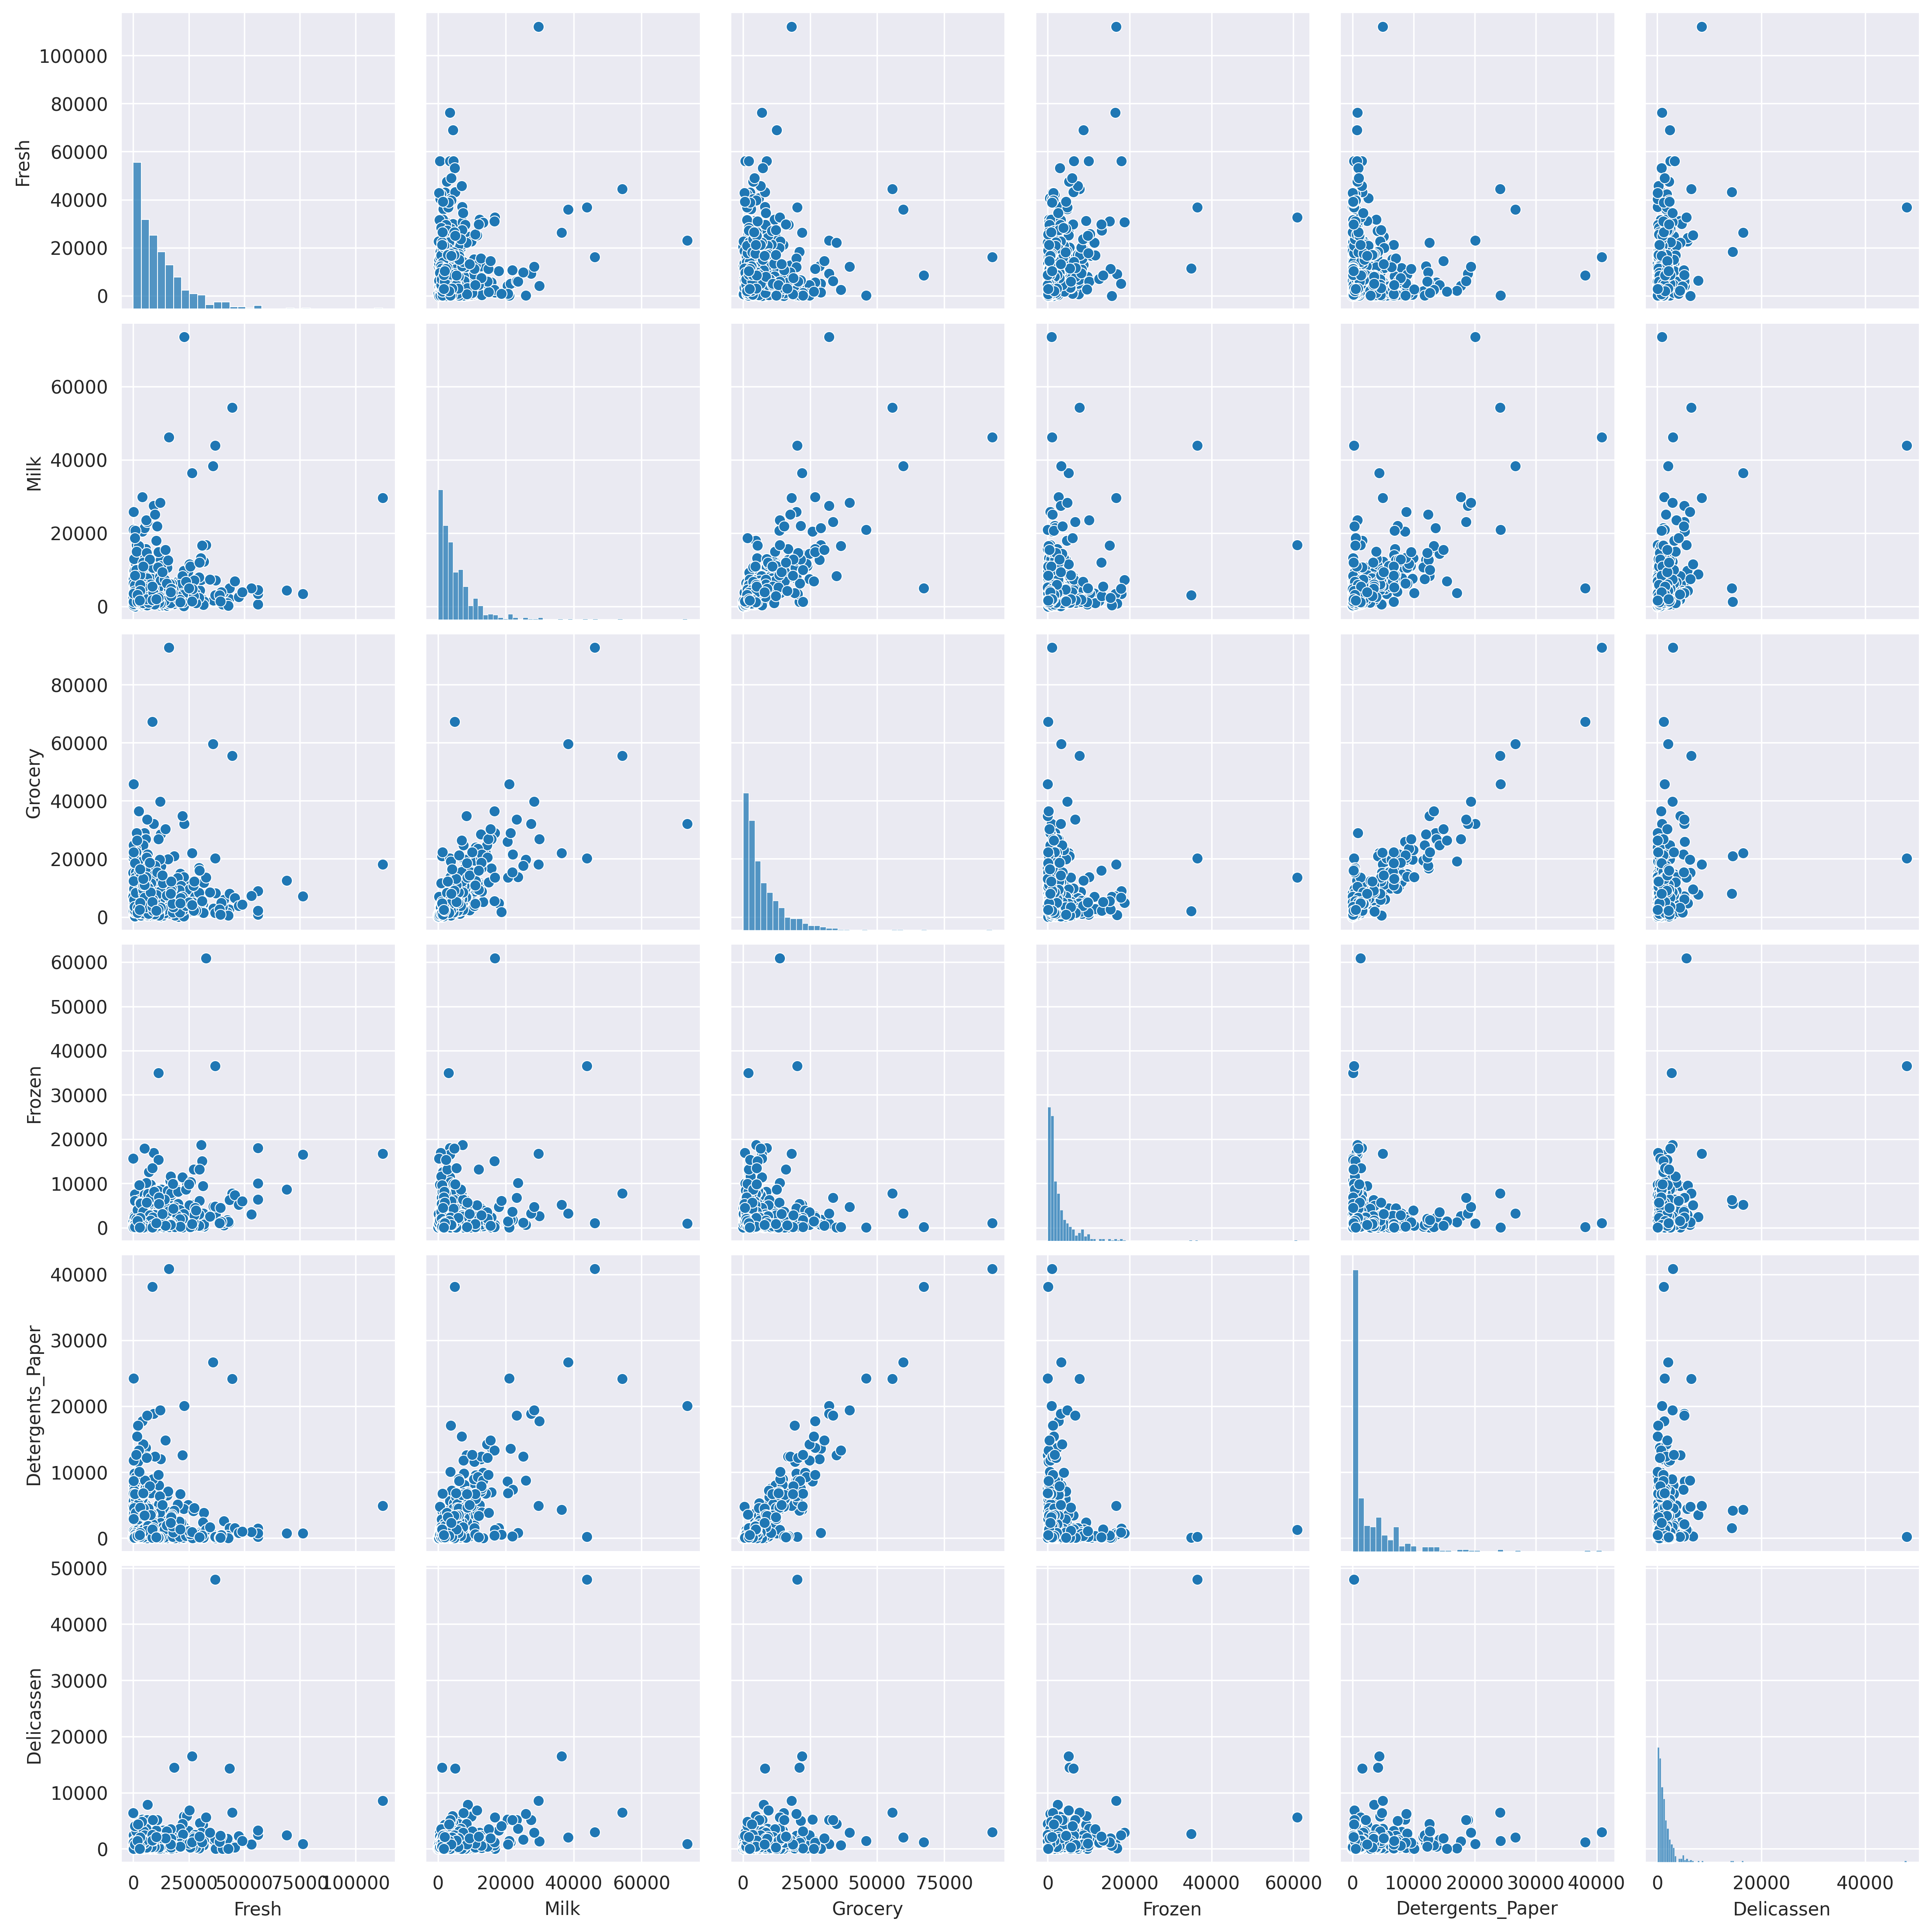

In [10]:
# let us have an idea of no of clusters with pairplot
sns.pairplot(df)
# there is only 1 cluster with outliers but we cant fully relay on scatterplot

In [11]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df)
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

# **model building**

In [12]:
from sklearn.cluster import DBSCAN


In [13]:
db=DBSCAN(eps=0.5,min_samples=3)# default eps=0.5
y=db.fit_predict(x)
y
# unique nos: -1,0,1,2,3,4,5
#-1: outliers, 0 to 5: 6 clusters are there
# max datapoints are outliers as eps is not appropriate i.e, its very small so its showing many outliers
# if u change eps and min_samples. it will directly impact accuracy of model so they are hyperparameter which must be eliminated

array([ 0,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1,  0,  0,
        4,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  1,  0,  0,  0, -1,
        0,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1,  2,  0, -1,  0, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  2,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  3, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,
        0, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,
       -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0,
        0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0

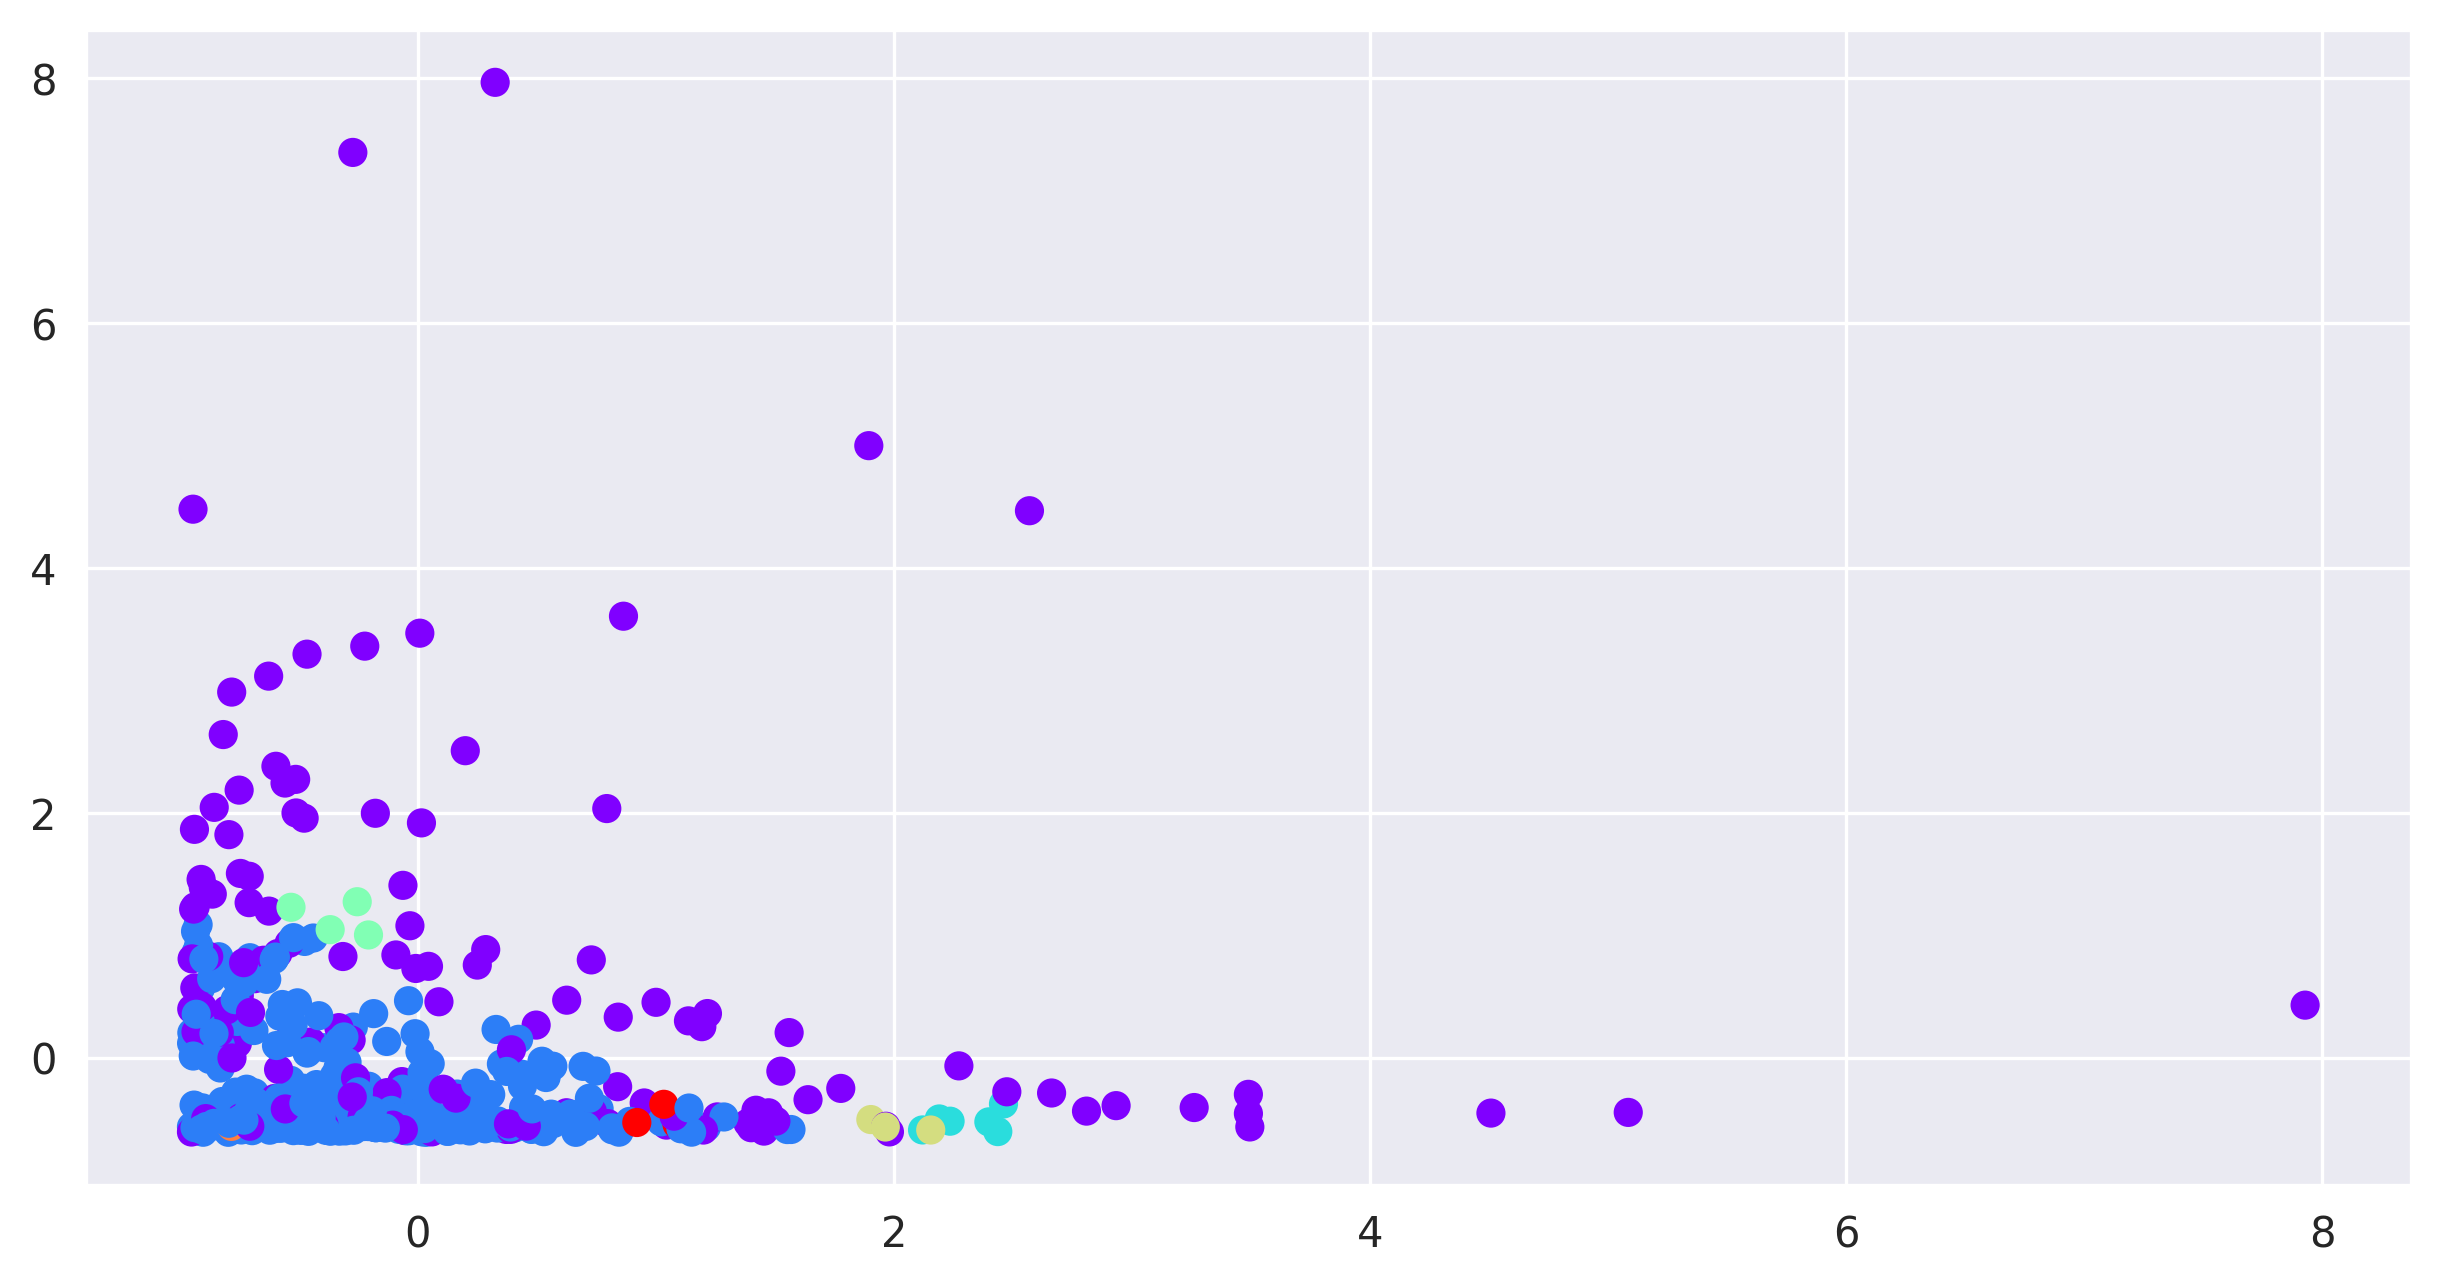

In [14]:
plt.scatter(x[:,0],x[:,4],c=y,cmap="rainbow")
#c=y i.e, give color coding to each data point depending upon which cluster it belong to
# in y we have cluster no for each data point and outlier information if it is -1
# plot of any 2 columns from x i.e, index 0 and 4 column
# clusters are overlapping ,purple data points are far away so they are outliers. so not a good model
#confirm it with silhouette score

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
silhouette_score(x,y)# parameters: x: standardized version of data, y: cluster labels
# score is approximately equal or near to 0 i.e, clusters are overlaping

-0.07329671681468523

# **Hyoerparameter Tuning**

selecting Min_samples or MinPts:

*   no of columns+1: 6+1 =7

*   no of columns*2 =6*2 =12

*   always keep min_samples atleast 3



In [17]:
from sklearn.neighbors import NearestNeighbors
# NearestNeighbors will calculate avg distance by cinsidering nearest data point

In [18]:
neighbor=NearestNeighbors(n_neighbors=3).fit(x)
# fit will calculate distence using euclidean distence method.
# n_neighbors: min sample. calculate nearest 3 data points of each data point
#eps values will be selected randomly by algorithm

In [19]:
# distences(calculated with eps value)are stored in neighbor
d,index=neighbor.kneighbors(x)
# kneighbors() will show distences.
# it returns 2 values, d: euclidean distences: 3 distences are there in every list as we have selected min sample as 3
# row index: which data is close to which other data point

In [20]:
neighbor.kneighbors(x)
# in d:[0.    ,0.4609,0.4946]
#1st column value: 0 represent distence of 1st nearest neighbor
#2nd column value: 0.4609 represent distence of 2nd nearest neighbor
#3rd column value: 0.4946 represent distence of 3nd nearest neighbor
# in 1st column every where distence is 0 because its the distence b/w x and itself so ignore 1st column

#index=[0,5,281]
# row 0 and 5 are closest to each other
#distence b/w row 0 is 0
#b/w row 0 and 5 is 0.4609, b/w row0 and 281 is 0.4974 and so on

# row 0 and 5 are closest to each other
# row 1 and 244 are closest to each other
# row 2 and 218 are closest to each other


(array([[0.        , 0.46098501, 0.49746796],
        [0.        , 0.34363739, 0.43048153],
        [0.        , 1.14424502, 1.2507466 ],
        ...,
        [0.        , 0.81088341, 1.05002533],
        [0.        , 0.30388049, 0.31430896],
        [0.        , 0.1811683 , 0.24002891]]),
 array([[  0,   5, 281],
        [  1, 244,  82],
        [  2, 218, 409],
        ...,
        [437,  77, 163],
        [438, 212, 429],
        [439,  34, 299]]))

In [21]:
d

array([[0.        , 0.46098501, 0.49746796],
       [0.        , 0.34363739, 0.43048153],
       [0.        , 1.14424502, 1.2507466 ],
       ...,
       [0.        , 0.81088341, 1.05002533],
       [0.        , 0.30388049, 0.31430896],
       [0.        , 0.1811683 , 0.24002891]])

In [22]:
index

array([[  0,   5, 281],
       [  1, 244,  82],
       [  2, 218, 409],
       ...,
       [437,  77, 163],
       [438, 212, 429],
       [439,  34, 299]])

In [23]:
d[:,1]

array([ 0.46098501,  0.34363739,  1.14424502,  0.32193368,  0.81980385,
        0.39751095,  0.34271218,  0.30537987,  0.24101484,  0.4458863 ,
        0.55646534,  0.17770256,  0.77328812,  0.54828334,  0.52268968,
        0.2732436 ,  0.28556562,  0.40142637,  0.41860312,  0.40879483,
        0.32860237,  0.17753441,  0.89470417,  4.62909095,  1.11479524,
        0.43841226,  0.15707717,  0.22438604,  0.59907909,  0.4476474 ,
        0.46751181,  0.1824026 ,  0.21968274,  0.64405001,  0.15148845,
        0.43052164,  0.74938184,  0.6473125 ,  0.73904992,  0.94326334,
        0.89470417,  0.42189667,  0.61258339,  0.25646131,  0.37465432,
        0.59907909,  0.35686625,  2.98810434,  0.49213861,  0.85031661,
        0.42610885,  0.28516416,  0.59069346,  0.36592169,  0.23609377,
        0.24101484,  1.47278754,  0.3115813 ,  0.14276283,  0.38982995,
        0.32737667,  2.98810434,  0.55346622,  0.33415256,  0.29519664,
        2.13347136,  0.19710987,  0.54828334,  0.57848917,  0.18

In [24]:
distence=np.sort(d[:,1]) # consider all rows and 1st nearest neighbor values i.e, 2nd column
distence

array([ 0.04438185,  0.04438185,  0.05323769,  0.05323769,  0.05967886,
        0.05967886,  0.06628148,  0.06628148,  0.07562688,  0.07562688,
        0.0906001 ,  0.0906001 ,  0.09573517,  0.09573517,  0.09708669,
        0.09708669,  0.09820424,  0.1138444 ,  0.1138444 ,  0.11524265,
        0.12722269,  0.12765414,  0.12765414,  0.13150813,  0.13150813,
        0.13419437,  0.13419437,  0.13861662,  0.13861662,  0.1417839 ,
        0.14276283,  0.14276283,  0.14585635,  0.15148845,  0.15148845,
        0.15208043,  0.15208043,  0.15230804,  0.15230804,  0.15392478,
        0.15392478,  0.15504455,  0.15504455,  0.15678346,  0.15678346,
        0.15682751,  0.15707717,  0.15707717,  0.15738395,  0.16092861,
        0.16095334,  0.16095334,  0.16251017,  0.16525716,  0.16525716,
        0.16645012,  0.16752299,  0.16869486,  0.16970611,  0.17213295,
        0.17237405,  0.17237405,  0.17322549,  0.17322549,  0.17753441,
        0.17770256,  0.17770256,  0.17835467,  0.17889164,  0.18

Text(0.5, 1.0, 'k-distence graph')

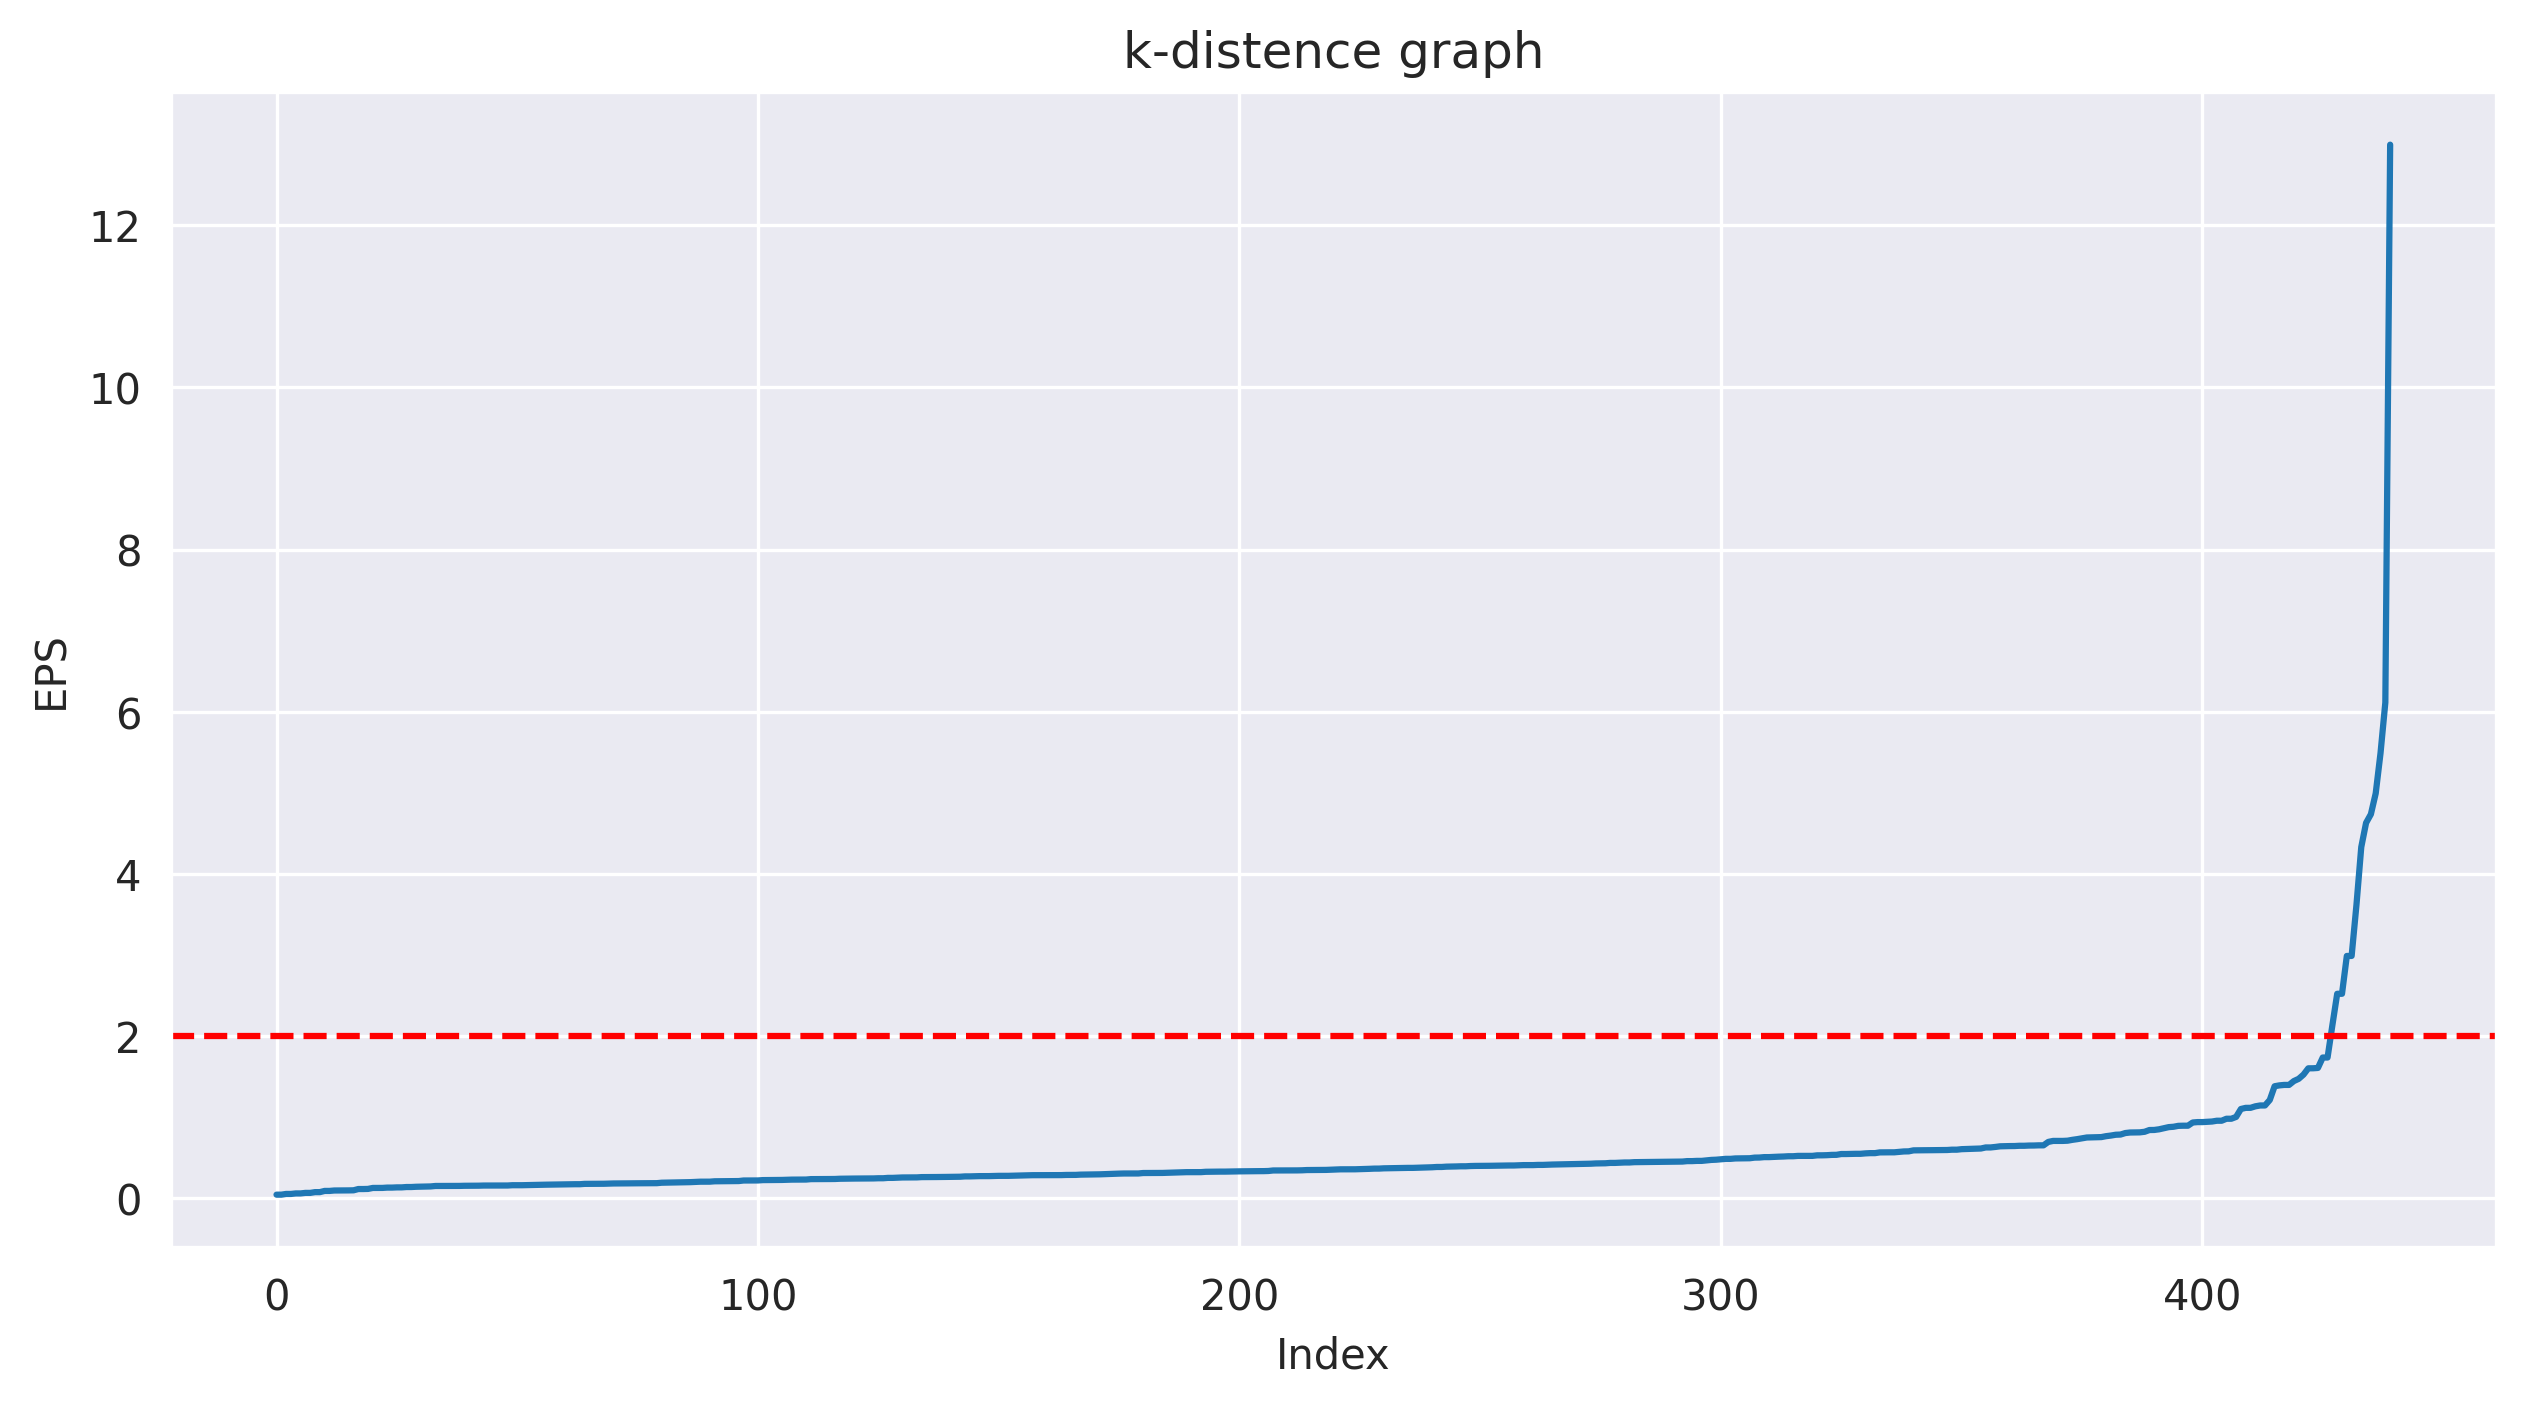

In [25]:
plt.plot(distence)
plt.axhline(y=2,linestyle="--",color="red") # y=2 means draw horizontal line at eps=2
plt.xlabel("Index")
plt.ylabel("EPS")
plt.title("k-distence graph")

# **Model Evaluation**

In [28]:
db=DBSCAN(eps=2,min_samples=3)# consider eps=2 try min_samples as 7 or 13 by rule and check silhouette method
yp=db.fit_predict(x)
yp# outliers are reduced, max clusters :1 i.e only one clusrter: cluster0

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

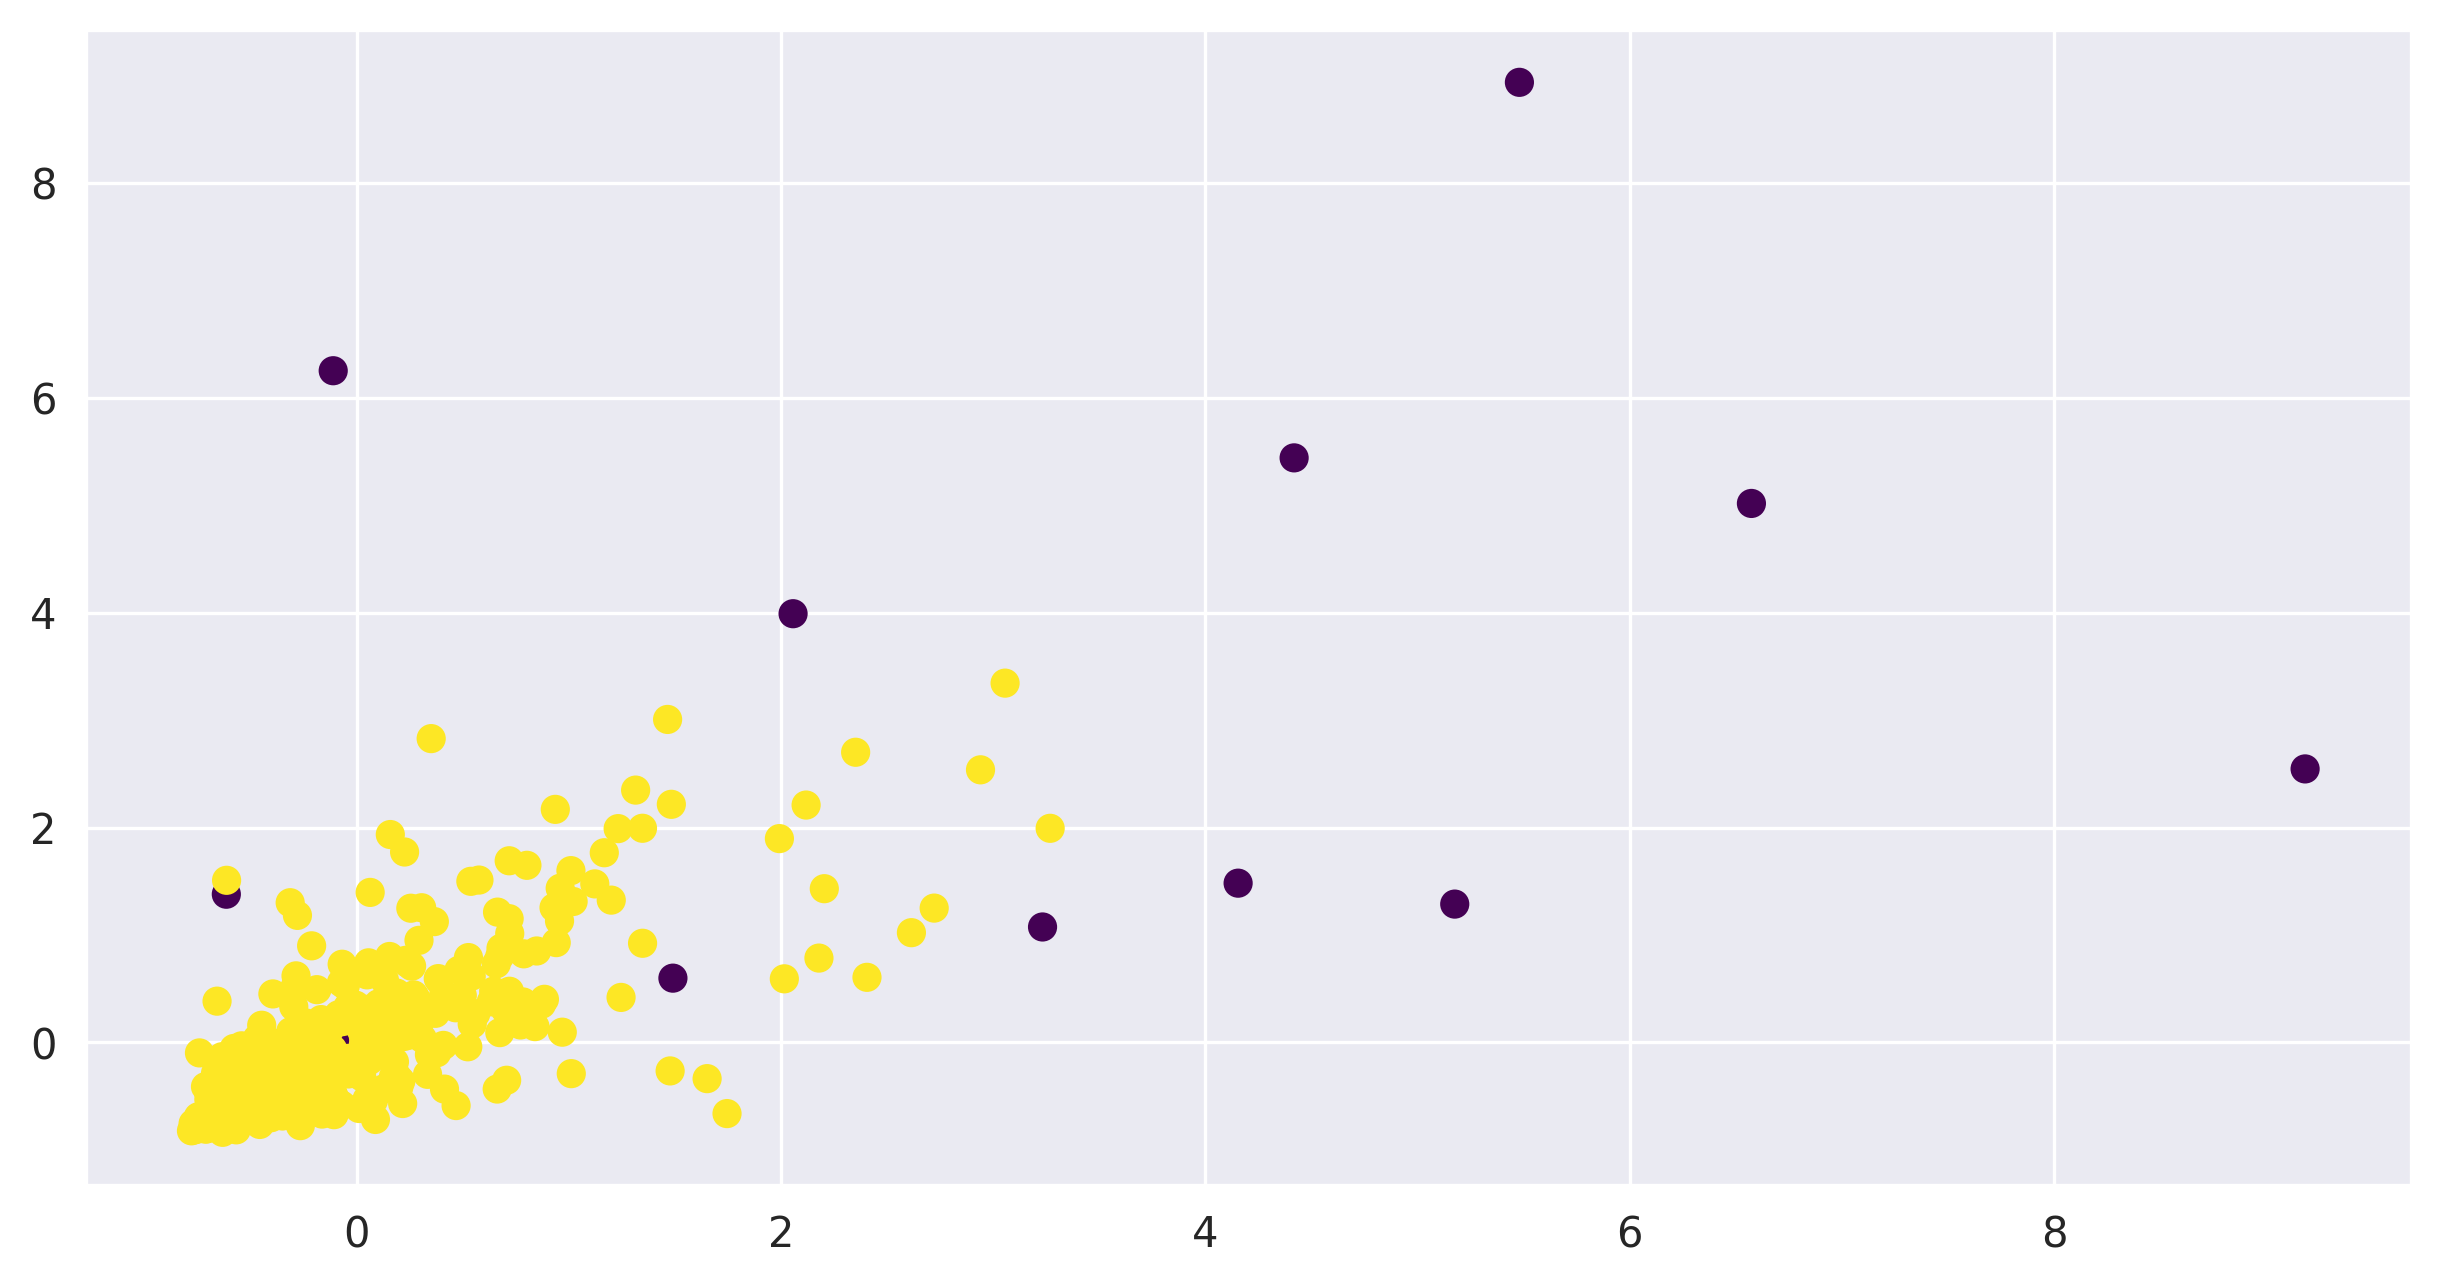

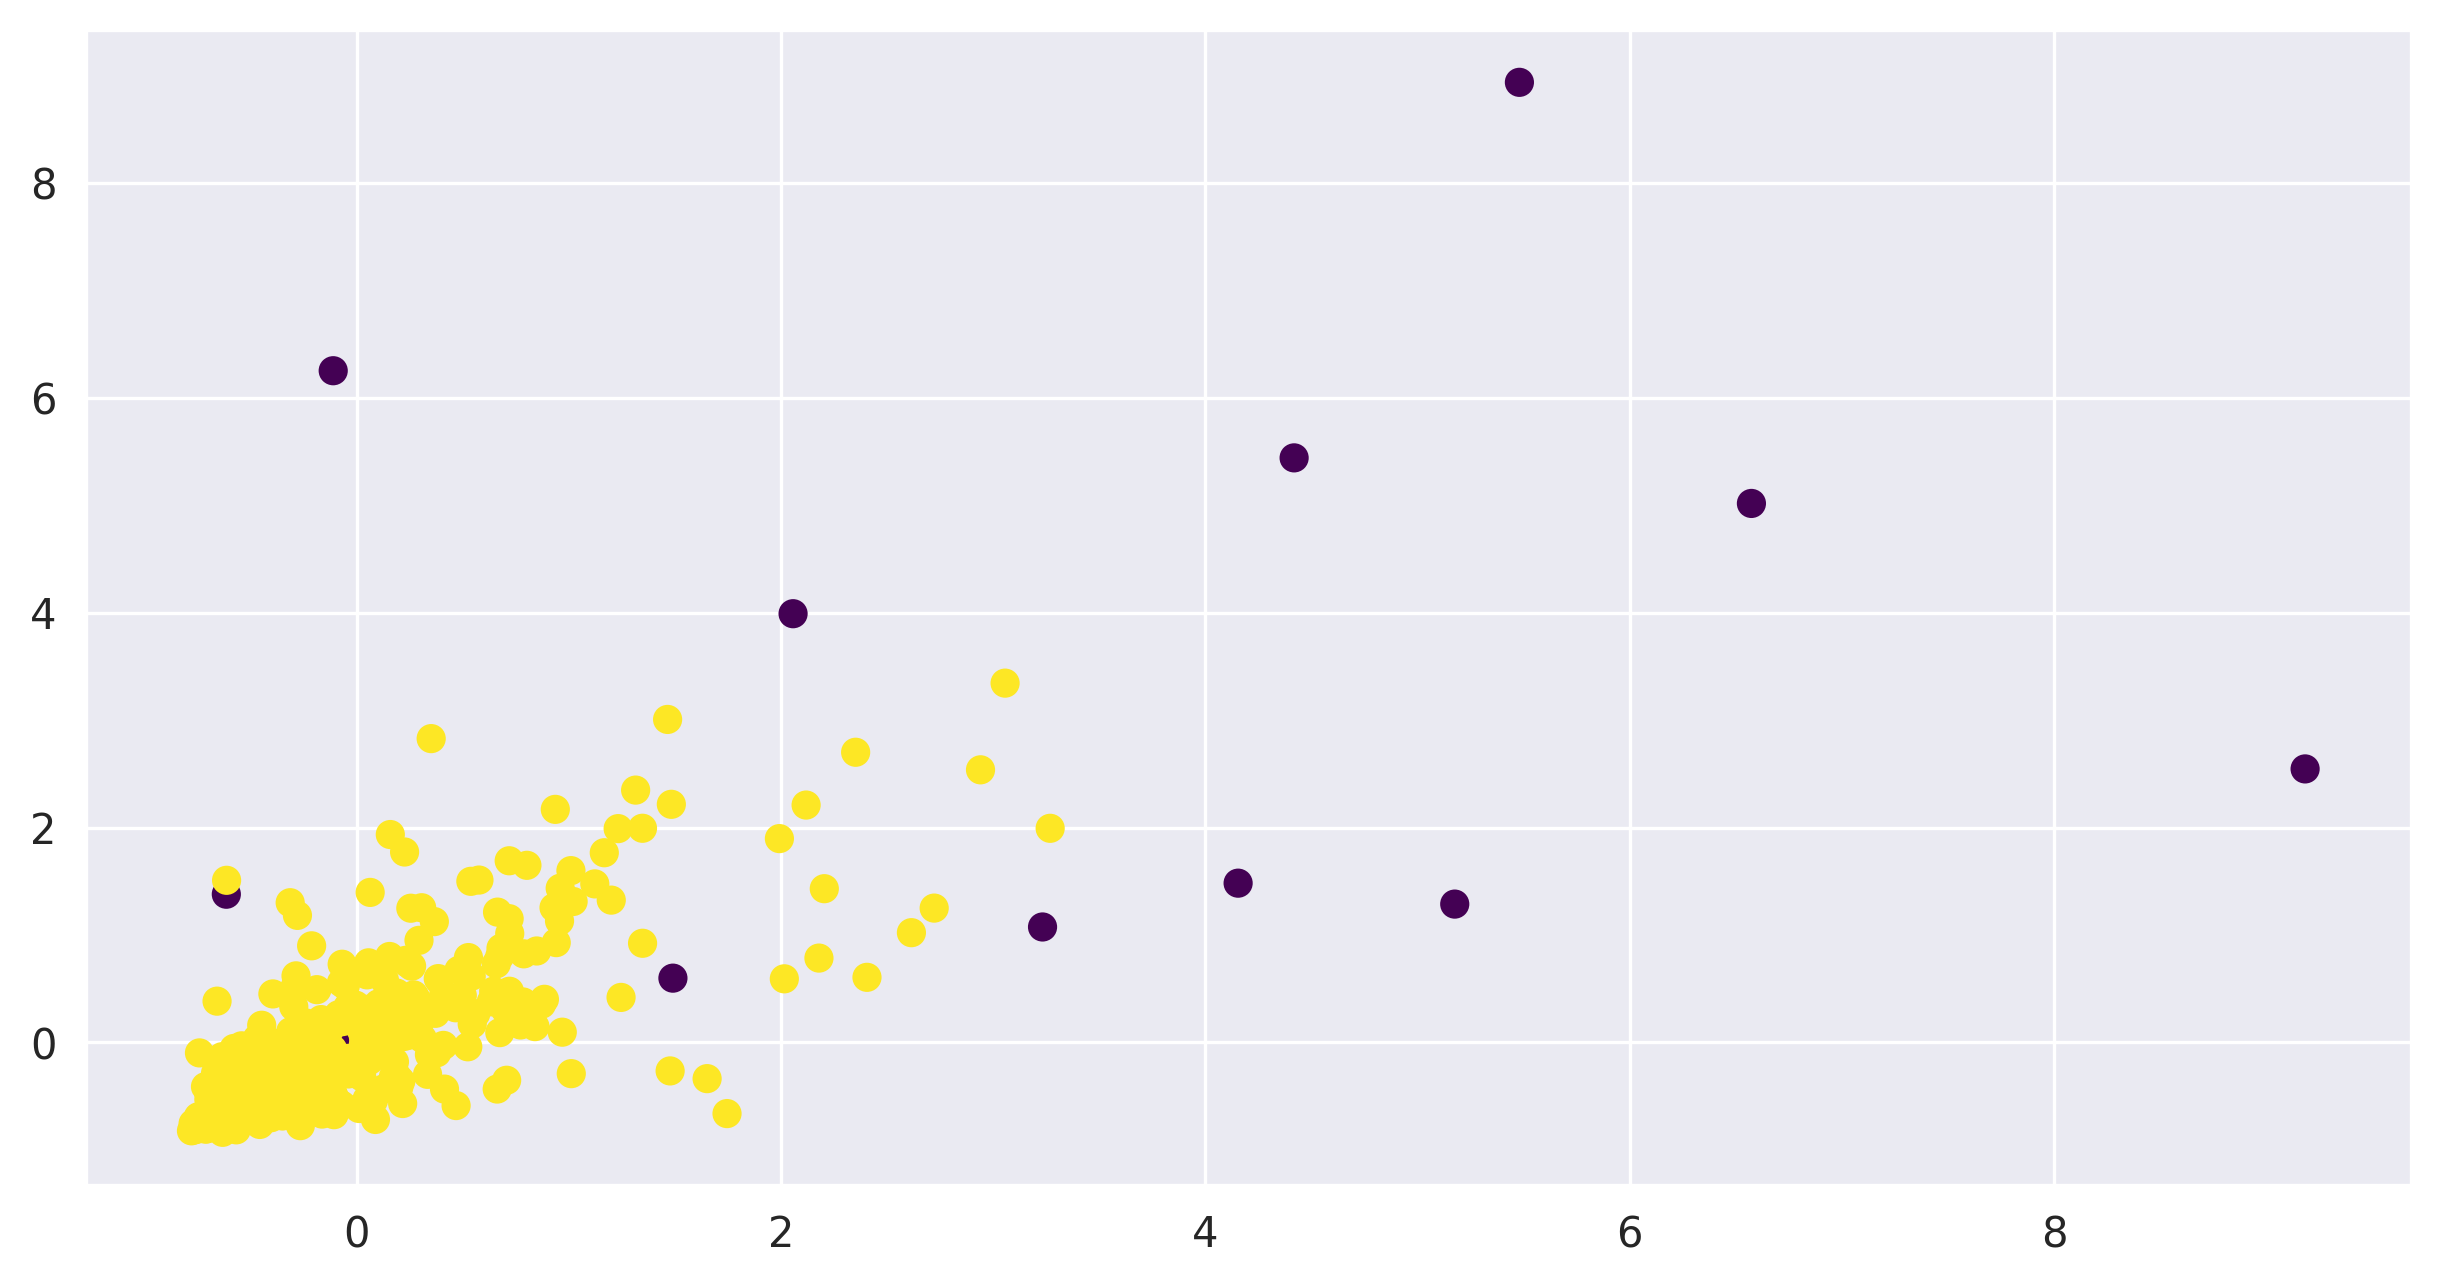

In [33]:
plt.scatter(x[:,1],x[:,2],c=yp,cmap="viridis")


In [34]:
silhouette_score(x,yp)

0.7486988127438182

In [35]:
# analyze the clusters
df["cluster"]=yp
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


In [36]:
df[df["cluster"]==-1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
23,26373,36423,22019,5154,4337,16523,-1
47,44466,54259,55571,7782,24171,6465,-1
61,35942,38369,59598,3254,26701,2017,-1
65,85,20959,45828,36,24231,1423,-1
71,18291,1266,21042,5373,4173,14472,-1
85,16117,46197,92780,1026,40827,2944,-1
86,22925,73498,32114,987,20070,903,-1
87,43265,5025,8117,6312,1579,14351,-1
93,11314,3090,2062,35009,71,2698,-1
181,112151,29627,18148,16745,4948,8550,-1


In [37]:
df[df["cluster"]==-1].shape[0]

13

In [39]:
df["cluster"].value_counts()

,count
cluster,
0,427
-1,13


In [40]:
# extract only normal data points
data=df[df["cluster"]==0]
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


In [41]:
df.groupby("cluster").agg("mean")

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
-1,31466.000000,28802.076923,35259.461538,13785.538462,14670.846154,9624.076923
0,11407.665105,5095.854801,7119.880562,2745.756440,2522.566745,1278.290398
